## Testing notebook showing basic functionality

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from calc_utils import kml_to_shp, load_shp, normalize_shps, shp_to_land, plot_land, observations_to_circles, expand_observations, \
                       daily_score_union, daily_attibution, monthly_attribution, cummulative_attribution, daily_video

In [106]:
# transform plots kml to shp
kml_to_shp(source_directory='test_data/KML/', destination_directory='test_data/SHP/')

########## Converting 3 ##########
Converted 3.kml to 3.shp
########## Converting 18 ##########
Converted 18.kml to 18.shp
########## Converting 9 ##########
Converted 9.kml to 9.shp


Warning 6: Normalized/laundered field name: 'description' to 'descriptio'
Warning 1: The output driver does not natively support DateTime type for field timestamp. Misconversion can happen. -mapFieldType can be used to control field type conversion.
Warning 6: Field timestamp create as date field, though DateTime requested.
Warning 1: The output driver does not natively support DateTime type for field begin. Misconversion can happen. -mapFieldType can be used to control field type conversion.
Warning 6: Field begin create as date field, though DateTime requested.
Warning 1: The output driver does not natively support DateTime type for field end. Misconversion can happen. -mapFieldType can be used to control field type conversion.
Warning 6: Field end create as date field, though DateTime requested.
Warning 6: Normalized/laundered field name: 'altitudeMode' to 'altitudeMo'
ERROR 1: Attempt to write non-point (POLYGON) geometry to point shapefile.
ERROR 1: Unable to write feature 14 from

In [107]:
# loading shp files
shp = load_shp('test_data/SHP/')
# some preprocessing of shps
normalized_shapes = normalize_shps(shp)
plots = shp_to_land(normalized_shapes)
# creating html map
plot_land(plots, 'test_plots.html')
print('You can see the map at test_plots.html')
plots.head()

You can see the map at test_plots.html


,geometry
18,"POLYGON Z ((-76.79781 0.87076 0.00000, -76.793..."
3,"POLYGON Z ((-76.79010 0.88457 0.00000, -76.787..."
9,"POLYGON Z ((-76.75651 0.89384 0.00000, -76.754..."


In [108]:
# loading observations
records = pd.read_csv('test_data/observations.csv')
print('Number of test observations: ', len(records))
records.head()

Number of test observations:  48


,eco_id,eco_date,species_id,name_common,name_latin,radius,score,lat,long,iNaturalist
0,11369,2023-11-30,22,rec4OhXboLvO3936j,Panthera onca,11,1.0,0.87029,-76.79010,https://www.inaturalist.org/observations/19457...
1,11136,2023-11-18,592,recUOMlBGkJ0ngdp1,Minquartia guianensis,2,0.5,0.89400,-76.75440,NaN
2,10897,2023-11-09,28,reccyb69IWR64Etqs,Ampelocera albertiae,6,0.5,0.89115,-76.75542,NaN
3,10905,2023-11-09,28,reccyb69IWR64Etqs,Ampelocera albertiae,6,0.5,0.89280,-76.75530,NaN
4,10896,2023-11-09,28,reccyb69IWR64Etqs,Ampelocera albertiae,6,0.5,0.89102,-76.75514,NaN


In [119]:
# from observations to circles
# crs for observations is 4326 because it is lat/lon
# crs for circles is 6262 because it is in meters
records = observations_to_circles(records, default_crs=4326, buffer_crs=6262)
records.head()

,eco_id,eco_date,species_id,name_common,name_latin,radius,score,lat,long,iNaturalist,geometry
0,11369,2023-11-30,22,rec4OhXboLvO3936j,Panthera onca,11,1.0,0.87029,-76.79010,https://www.inaturalist.org/observations/19457...,"POLYGON ((-76.69131 0.87027, -76.69179 0.86052..."
1,11136,2023-11-18,592,recUOMlBGkJ0ngdp1,Minquartia guianensis,2,0.5,0.89400,-76.75440,NaN,"POLYGON ((-76.73644 0.89400, -76.73653 0.89222..."
2,10897,2023-11-09,28,reccyb69IWR64Etqs,Ampelocera albertiae,6,0.5,0.89115,-76.75542,NaN,"POLYGON ((-76.70154 0.89114, -76.70180 0.88582..."
3,10905,2023-11-09,28,reccyb69IWR64Etqs,Ampelocera albertiae,6,0.5,0.89280,-76.75530,NaN,"POLYGON ((-76.70142 0.89279, -76.70168 0.88747..."
4,10896,2023-11-09,28,reccyb69IWR64Etqs,Ampelocera albertiae,6,0.5,0.89102,-76.75514,NaN,"POLYGON ((-76.70126 0.89101, -76.70152 0.88569..."


In [110]:
# each observation is "expanded" to the 29 days before and 30 days after the observation date
obs_expanded = expand_observations(records)
obs_expanded.head()

,eco_id,eco_date,species_id,name_common,name_latin,radius,score,lat,long,iNaturalist,geometry,day,date
0,11369,2023-11-30,22,rec4OhXboLvO3936j,Panthera onca,11,1.0,0.87029,-76.7901,https://www.inaturalist.org/observations/19457...,"POLYGON ((-76.69131 0.87027, -76.69179 0.86052...",-29,2023-11-01
1,11369,2023-11-30,22,rec4OhXboLvO3936j,Panthera onca,11,1.0,0.87029,-76.7901,https://www.inaturalist.org/observations/19457...,"POLYGON ((-76.69131 0.87027, -76.69179 0.86052...",-28,2023-11-02
2,11369,2023-11-30,22,rec4OhXboLvO3936j,Panthera onca,11,1.0,0.87029,-76.7901,https://www.inaturalist.org/observations/19457...,"POLYGON ((-76.69131 0.87027, -76.69179 0.86052...",-27,2023-11-03
3,11369,2023-11-30,22,rec4OhXboLvO3936j,Panthera onca,11,1.0,0.87029,-76.7901,https://www.inaturalist.org/observations/19457...,"POLYGON ((-76.69131 0.87027, -76.69179 0.86052...",-26,2023-11-04
4,11369,2023-11-30,22,rec4OhXboLvO3936j,Panthera onca,11,1.0,0.87029,-76.7901,https://www.inaturalist.org/observations/19457...,"POLYGON ((-76.69131 0.87027, -76.69179 0.86052...",-25,2023-11-05


In [111]:
# the expanded observations are unioned to create a daily geometry for each score
# this process the venn_decomposition function, which decomposes a list of scored polygons into 
# a venn-like diagram, assigning the highest score to each section and merging the equal-score sections
daily_score = daily_score_union(obs_expanded)
daily_score.head()

,date,level_1,score,geometry
0,2018-12-08,0,1.0,"POLYGON ((-76.68943 0.86735, -76.68991 0.85761..."
1,2018-12-09,0,1.0,"POLYGON ((-76.68943 0.86735, -76.68991 0.85761..."
2,2018-12-10,0,1.0,"POLYGON ((-76.68943 0.86735, -76.68991 0.85761..."
3,2018-12-11,0,1.0,"POLYGON ((-76.68943 0.86735, -76.68991 0.85761..."
4,2018-12-12,0,1.0,"POLYGON ((-76.68943 0.86735, -76.68991 0.85761..."


Polygons for date:  2023-07-01
Displayed in separate plots for each score


,date,level_1,score,geometry
527,2023-07-01,0,0.5,"POLYGON ((-76.76310 0.81966, -76.76788 0.81739..."
528,2023-07-01,1,1.0,"POLYGON ((-76.81415 0.91518, -76.81415 0.91518..."


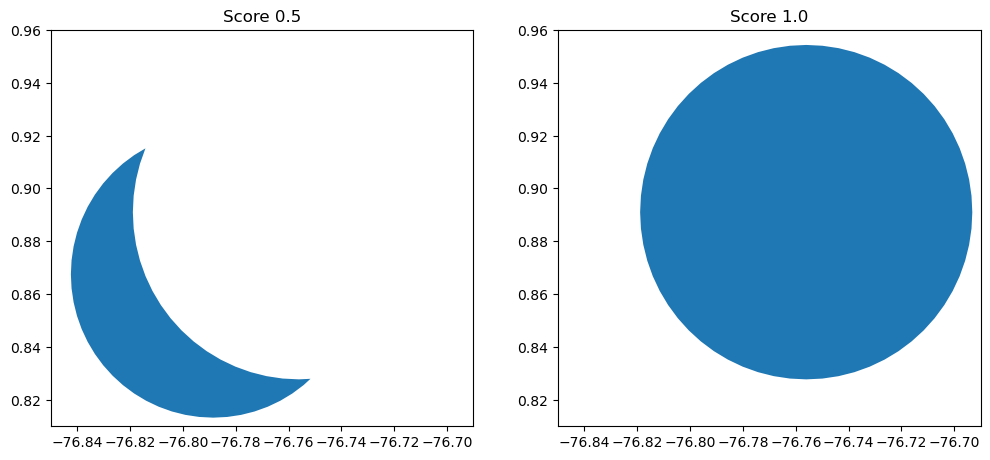

In [112]:
# just to visualize these geometries, we can pick a date and plot both scores
date = '2023-07-01'
print('Polygons for date: ', date)  
print('Displayed in separate plots for each score')
fig, ax = plt.subplots(1,2, figsize=(12,6))
daily_score.query(f'date == "{date}" and score == 0.5').plot(ax=ax[0])
daily_score.query(f'date == "{date}" and score ==  1').plot(ax=ax[1])
ax[0].set_xlim([-76.85, -76.69])
ax[0].set_ylim([0.81, 0.96])
ax[1].set_xlim([-76.85, -76.69])
ax[1].set_ylim([0.81, 0.96])
ax[0].set_title('Score 0.5')
ax[1].set_title('Score 1.0')
daily_score.query(f'date == "{date}"')

In [113]:
# now we can calculate the daily attribution for each plot_id-score-date combination
# the area_score is the area of the intersection of the score polygon and the plot polygon multiplied by the score
attribution = daily_attibution(daily_score, plots, obs_expanded, crs=6262)
attribution.head()

,plot_id,score,total_area,area_intersect,area_score,eco_id
date,,,,,,
2023-12-30,18,1.0,142.034201,142.034201,142.034201,[11369]
2023-12-30,3,1.0,64.834050,64.834050,64.834050,[11369]
2023-12-30,9,1.0,10.096988,10.096988,10.096988,[11369]
2023-12-29,18,1.0,142.034201,142.034201,142.034201,[11369]
2023-12-29,3,1.0,64.834050,64.834050,64.834050,[11369]


In [114]:
# now we can compute the monthly attibution
# the monthly attribution is the sum of the area_score for each plot_id-month combination divided by 60
# calc_index is the plot_id-month combination
attr_month = monthly_attribution(attribution)
attr_month.head()

,calc_index,calc_date,plot_id,total_area,credits,eco_id_list,eco_id
70,18-December-2023,2023-12-31,18,142.034201,71.017101,[11369],11369
71,3-December-2023,2023-12-31,3,64.834050,32.417025,[11369],11369
72,9-December-2023,2023-12-31,9,10.096988,5.048494,[11369],11369
67,18-November-2023,2023-11-30,18,142.034201,71.017101,"[10380, 11369]","10380, 11369"
68,3-November-2023,2023-11-30,3,64.834050,32.417025,"[10380, 11369]","10380, 11369"


In [116]:
# now we can compute the cummulative attributions
attr_cumm = cummulative_attribution(attr_month, cutdays = 30, start_date=None)
attr_cumm.head()


,plot_id,first_date,last_date,total_area,credits,eco_id_list,eco_id
0,3,2018-12-31,2023-11-30,64.834050,481.933107,"[53, 80, 87, 414, 415, 426, 1099, 1104, 1253, ...","53, 80, 87, 414, 415, 426, 1099, 1104, 1253, 1..."
1,9,2018-12-31,2023-11-30,10.096988,66.387697,"[53, 87, 1099, 1104, 1229, 1230, 1231, 1253, 1...","53, 87, 1099, 1104, 1229, 1230, 1231, 1253, 12..."
2,18,2018-12-31,2023-11-30,142.034201,1055.787562,"[53, 80, 87, 414, 415, 426, 1099, 1104, 1253, ...","53, 80, 87, 414, 415, 426, 1099, 1104, 1253, 1..."


Processing frame 0 with index 0
Processing frame 0 with index 0
Processing frame 100 with index 100
Processing frame 200 with index 200
Processing frame 300 with index 300
Processing frame 400 with index 400
Processing frame 500 with index 500
Processing frame 600 with index 600
Processing frame 700 with index 700
Processing frame 800 with index 800
Processing frame 900 with index 900
Processing frame 1000 with index 1000
Processing frame 1100 with index 1100
Processing frame 1200 with index 1200
Processing frame 1300 with index 1300
Processing frame 1400 with index 1400
Processing frame 1500 with index 1500
Processing frame 1600 with index 1600
Processing frame 1700 with index 1700
Processing frame 1800 with index 1800


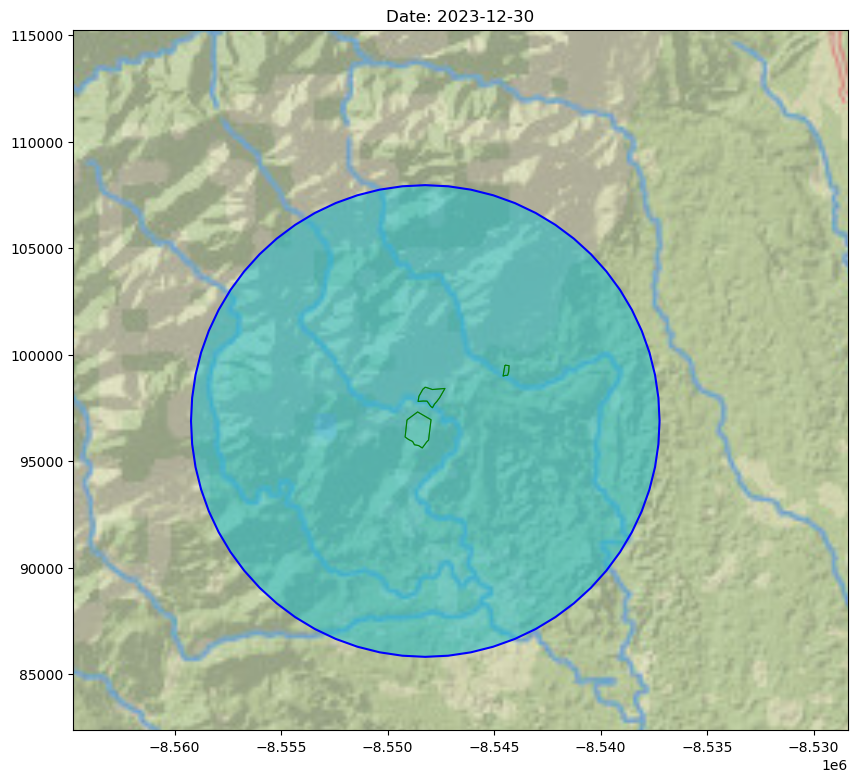

In [118]:
# finally for visualization we can create a video called raindrops.mp4
daily_video(daily_score, plots, first_date=None)